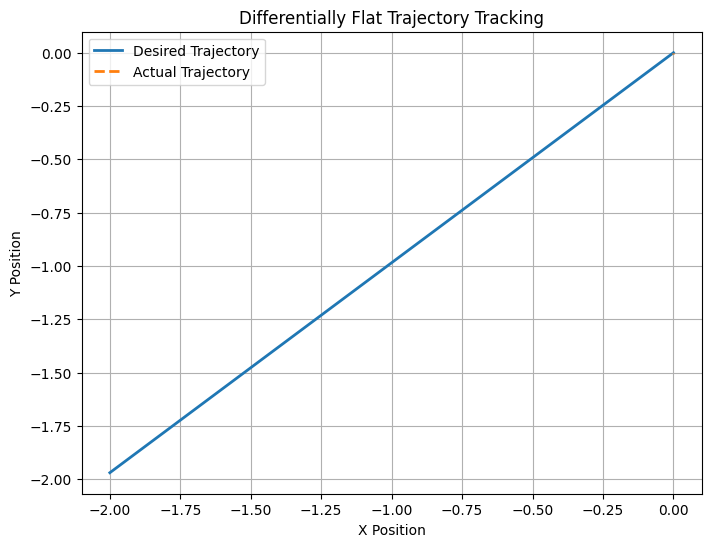

In [4]:
# QUESTION 5a
import numpy as np
import matplotlib.pyplot as plt


# Define basis functions
def phi1(t):
    return t ** 3


def phi2(t):
    return t ** 2


def phi3(t):
    return t


def phi4(t):
    return 1


# Define desired trajectory in terms of flat output variable z=(x, y)
def z_desired(t):
    x_des = phi1(t) / 6 - phi2(t) / 2 + 2 * phi3(t) - 2 * phi4(t)
    y_des = phi1(t) / 6 + phi2(t) / 2
    return np.array([x_des, y_des])


# Compute desired velocities and accelerations
t = np.linspace(0, 15, 1000)
z_des = z_desired(t)
z_dot_des = np.gradient(z_des, axis=0)
z_ddot_des = np.gradient(z_dot_des, axis=0)

# Compute control inputs using differentially flat equations
a_des = np.sqrt(z_dot_des[:, 0] ** 2 + z_dot_des[:, 1] ** 2)
omega_des = (z_dot_des[:, 0] * z_ddot_des[:, 1] - z_dot_des[:, 1] * z_ddot_des[:, 0]) / (
            z_dot_des[:, 0] ** 2 + z_dot_des[:, 1] ** 2)

# Integrate control inputs using numerical integration
dt = t[1] - t[0]
v_des = np.cumsum(a_des) * dt
theta_des = np.cumsum(omega_des) * dt

# Apply open loop controller to navigate robot along trajectory
x = np.zeros_like(v_des)
y = np.zeros_like(v_des)
V = np.ones_like(v_des) * 0.5
theta = np.ones_like(v_des) * (-np.pi / 2)

for i in range(1, len(v_des)):
    x[i] = x[i - 1] + V[i - 1] * np.cos(theta[i - 1]) * dt
    y[i] = y[i - 1] + V[i - 1] * np.sin(theta[i - 1]) * dt
    V[i] = v_des[i]
    theta[i] = theta_des[i]

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(z_des[:, 0], z_des[:, 1], label="Desired Trajectory", linewidth=2)
plt.plot(x, y, label="Actual Trajectory", linestyle="--", linewidth=2)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Differentially Flat Trajectory Tracking")
plt.legend()
plt.grid(True)
plt.show()


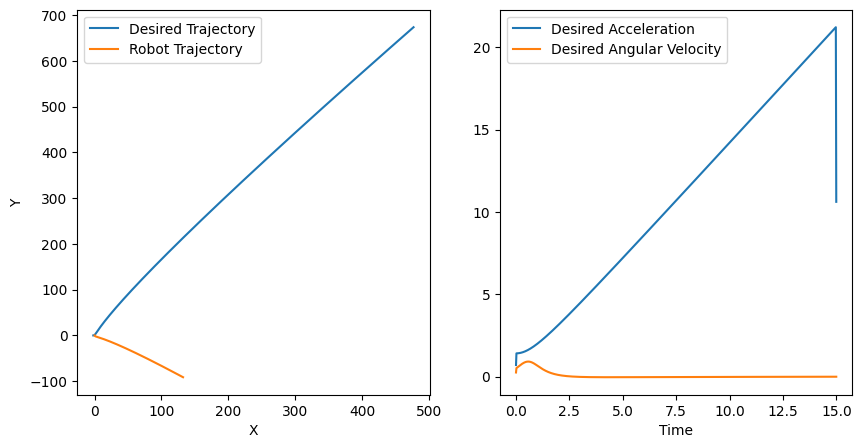

In [6]:
# QUESTION 5b
import numpy as np
import matplotlib.pyplot as plt


# Define basis functions
def phi1(t):
    return t ** 3


def phi2(t):
    return t ** 2


def phi3(t):
    return t


def phi4(t):
    return 1


# Create a time array
tf = 15
dt = 0.01
t = np.arange(0, tf, dt)


# Define desired trajectory in terms of flat output variable z=(x, y)
def z_desired(t):
    x_des = phi1(t) / 6 - phi2(t) / 2 + 2 * phi3(t) - 2 * phi4(t)
    y_des = phi1(t) / 6 + phi2(t) / 2
    return np.array([x_des, y_des])


# Compute desired trajectory
z_des = z_desired(t)

# Compute desired velocities and accelerations
z_dot_des = np.gradient(z_des, axis=1) / dt
z_ddot_des = np.gradient(z_dot_des, axis=1) / dt

# Compute control inputs using differentially flat equations
a_des = np.linalg.norm(z_ddot_des, axis=0)
omega_des = (z_dot_des[0] * z_ddot_des[1] - z_ddot_des[0] * z_dot_des[1]) / (z_dot_des[0] ** 2 + z_dot_des[1] ** 2)

# Initialize state variables
x = 0.0
y = 0.0
V = 0.5
theta = -np.pi / 2

# Initialize arrays to store the trajectory
x_traj = []
y_traj = []

# Simulate the robot to follow the trajectory
for i in range(len(t)):
    x_traj.append(x)
    y_traj.append(y)

    x_dot = V * np.cos(theta)
    y_dot = V * np.sin(theta)

    x = x + x_dot * dt
    y = y + y_dot * dt
    V = a_des[i]
    theta = theta + omega_des[i] * dt

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(z_des[0], z_des[1], label='Desired Trajectory')
plt.plot(x_traj, y_traj, label='Robot Trajectory')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, a_des, label='Desired Acceleration')
plt.plot(t, omega_des, label='Desired Angular Velocity')
plt.xlabel('Time')
plt.legend()

plt.show()


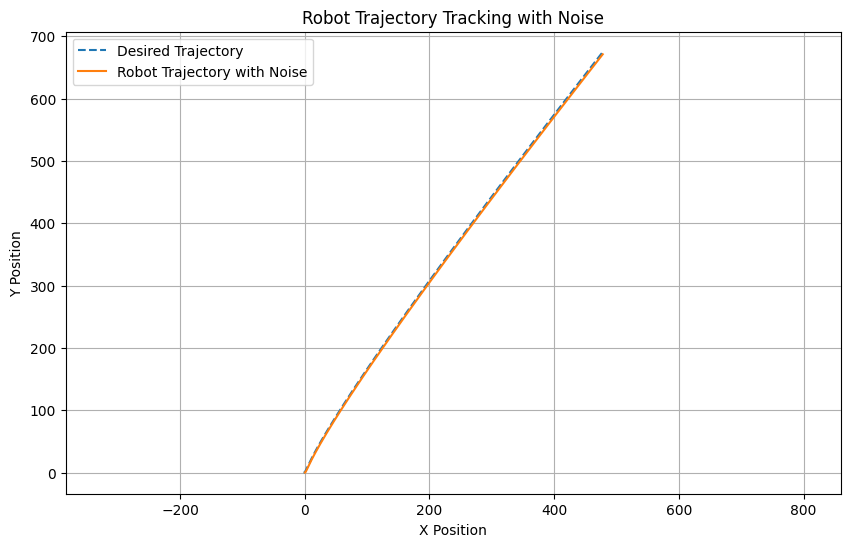

In [5]:
# QUESTION 5c
import numpy as np
import matplotlib.pyplot as plt

# Define basis functions
def phi1(t):
    return t**3

def phi2(t):
    return t**2

def phi3(t):
    return t

def phi4(t):
    return 1

# Define desired trajectory in terms of flat output variable z=(x,y)
def z_desired(t):
    x_des = phi1(t)/6 - phi2(t)/2 + 2*phi3(t) - 2*phi4(t)
    y_des = phi1(t)/6 + phi2(t)/2
    return np.array([x_des, y_des])

# Compute control inputs using differentially flat equations
def compute_control_inputs(z_des, dt):
    z_dot_des = np.gradient(z_des, axis=1) / dt
    z_ddot_des = np.gradient(z_dot_des, axis=1) / dt

    a_des = np.sqrt(z_ddot_des[0]**2 + z_ddot_des[1]**2)
    omega_des = (z_ddot_des[1]*z_dot_des[0] - z_ddot_des[0]*z_dot_des[1]) / (z_dot_des[0]**2 + z_dot_des[1]**2)

    return a_des, omega_des

# Integrate control inputs using numerical integration with noise
def integrate_control_inputs(a_des, omega_des, dt, t):
    v_des = np.cumsum(a_des) * dt
    theta_des = np.cumsum(omega_des) * dt

    # Add noise to velocity and orientation
    v_noise = 0.01 * np.random.randn(len(t))
    theta_noise = 0.001 * np.random.randn(len(t))

    v_des += v_noise
    theta_des += theta_noise

    return v_des, theta_des

# Apply open-loop controller to navigate robot along trajectory
def navigate_robot(t, v_des, theta_des, initial_conditions):
    dt = t[1] - t[0]
    x = np.zeros_like(v_des)
    y = np.zeros_like(v_des)
    V = np.ones_like(v_des) * initial_conditions['initial_velocity']
    theta = np.ones_like(v_des) * initial_conditions['initial_orientation']

    for i in range(1, len(v_des)):
        x[i] = x[i-1] + V[i-1] * np.cos(theta[i-1]) * dt
        y[i] = y[i-1] + V[i-1] * np.sin(theta[i-1]) * dt
        V[i] = v_des[i]
        theta[i] = theta_des[i]

    return x, y

# Main function
def main():
    # Define initial conditions
    initial_conditions = {
        'initial_velocity': 0.5,
        'initial_orientation': -np.pi/2
    }

    # Define time step
    dt = 0.01

    # Define time vector
    t = np.arange(0, 15, dt)

    # Compute desired trajectory and control inputs
    z_des = np.array([z_desired(ti) for ti in t])
    a_des, omega_des = compute_control_inputs(z_des.T, dt)

    # Integrate control inputs with noise
    v_des, theta_des = integrate_control_inputs(a_des, omega_des, dt, t)

    # Navigate the robot along the trajectory
    x, y = navigate_robot(t, v_des, theta_des, initial_conditions)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(z_des[:,0], z_des[:,1], label='Desired Trajectory', linestyle='--')
    plt.plot(x, y, label='Robot Trajectory with Noise')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Robot Trajectory Tracking with Noise')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

if __name__ == "__main__":
    main()
